# Additional Quiz Python files

Data set : medical stroke dataset

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt=pd.read_csv('healthcare-dataset-stroke-data-1.csv')

In [72]:
dt.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [73]:
dt.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [75]:
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])

In [76]:
X = dt[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
dt.loc[Missing.index,'bmi'] = predicted_bmi

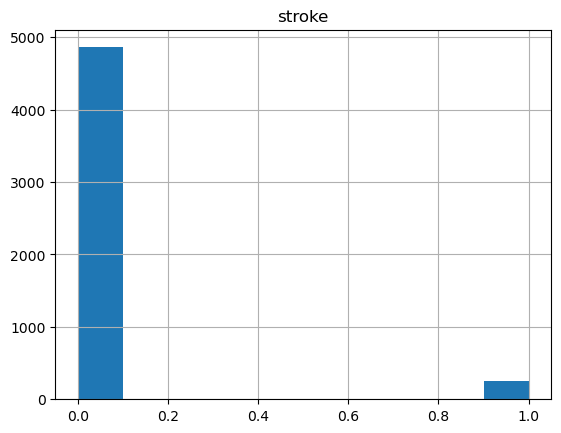

In [77]:
fig=dt.hist('stroke')

There is a imbalance in data set
so we go for upscaling

we will have to deal with this problem potentially with upscaling; that way, we give our models a better chance of learning the small details which define potential stroke individuals.

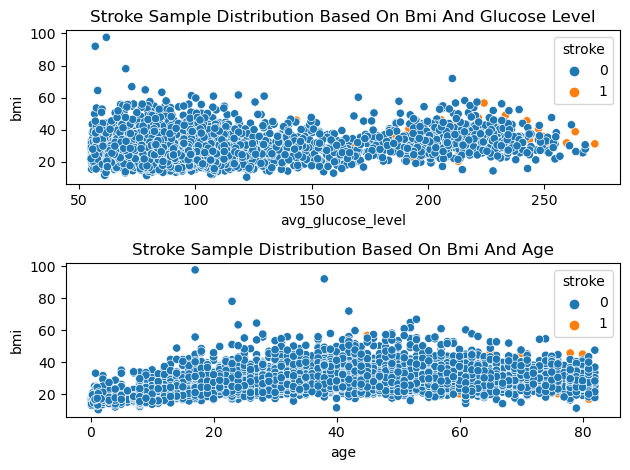

In [78]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=dt['avg_glucose_level'],y=dt['bmi'],hue=dt['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=dt['age'],y=dt['bmi'],hue=dt['stroke'])
plt.tight_layout()
plt.show()

It seems that we have two underlying populations based on the first scatter plot where the x-axis is the glucose level.
What it visible straight away is the fact the in both scatterplots the individuals who had a stroke are located in the BMI value region under 60 and in high glucose levels as well as old age.

In [79]:
dt['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [80]:
dt['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [81]:
dt['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [82]:
dt['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [83]:
dt.replace({'gender':{'Female':0,'Male':1,'Other':2}}, inplace=True)
dt.replace({'work_types':{'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}}, inplace=True)
dt.replace({'Residence_type':{'Urban':0,'Rural':1}}, inplace=True)
dt.replace({'smoking_status':{'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3}}, inplace=True)

In [84]:
dt['smoking_status'].value_counts()

0    1892
1    1544
2     885
3     789
Name: smoking_status, dtype: int64

In [85]:
x=dt[['age','gender','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status','Residence_type']]

In [86]:
y=dt[['stroke']]

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

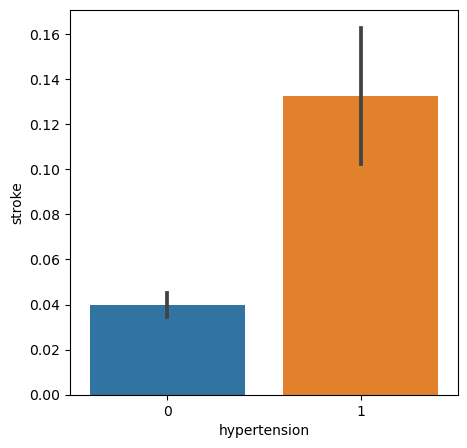

In [87]:
plt.figure(figsize=(5,5))
sns.barplot(x='hypertension', y='stroke', data=dt)

<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

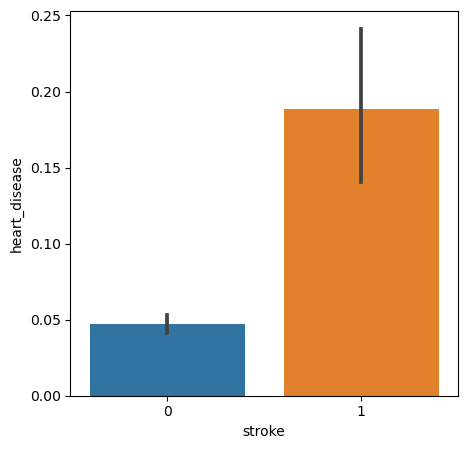

In [88]:
plt.figure(figsize=(5,5))
sns.barplot(y='heart_disease', x='stroke', data=dt)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtc = DecisionTreeClassifier()

In [93]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
y_pred=dtc.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test,y_pred)

array([[1367,   85],
       [  73,    8]], dtype=int64)

In [97]:
(1378+13)/(1378+82+60+13)

0.9073711676451403

In [98]:
model_pred = dtc.predict(x_test)

#  Model building for random forest

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 150)
RandomForest.fit(x_train, y_train)

C:\Users\Suba\AppData\Local\Temp\ipykernel_13848\665814649.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(x_train, y_train)


RandomForestClassifier(n_estimators=150)

In [106]:
y_predict_test = RandomForest.predict(x_test)

In [107]:
cm = confusion_matrix(y_test, y_predict_test)

In [108]:
cm

array([[1445,    7],
       [  81,    0]], dtype=int64)

In [110]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533



In [111]:
(1445+7)/(1445+7+81+0)

0.9471624266144814

560

In [114]:
560/80

7.0